# Create a Story from a Dataset #

<u> Exercise Steps <u/>  
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is about storytelling, not cleaning... :)  
2. Pick your audience: executive, technical, or non-technical; and ajust your tone accordingly.  
3. Take a look at the data: explore it.  
4. Think of a narrative, and pursue it.  
5. Give a 15 minute presentation to your mentor during your next call.  
  
In your quest, you might need to ask a bunch of other questions, such as:  
- Can I count something interesting?  
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?  
- Can I make a bar plot or a histgram?  
- Can I compare two related quantities?  
- Can I make a scatterplot?  
- Can I make a time-series plot? 
- Looking at the plots, what are some insights I can make?  
- Can I see any correlations?  
- Is there a hypothesis I can - and should - investigate further?  
- What other questions care the insights leading me to ask?  
  
Make a Jupyter notebook or PowerPoint to tell the story you produce. Make sure that your story is appropriate for the audience type you selected.  
  
Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a PowerPoint. The file should contain:  
- The questions you asked  
- The trends you investigated  
- The resulting visualizations and conclusions.  
  
You can find the rubric [here](https://docs.google.com/document/d/1dp3rOhTjHwjN5lOkXUYc8Qtr6mXE89PuuCV1afSavgk/edit?usp=sharing).  
  
The link for the Kaggle dataset can be found [here](https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success?resource=download).

[Here is the link](https://docs.google.com/presentation/d/1c7IzDd5saudUuP70xXm-4U0WwZYApG_3wFpv_HweTeI/edit?usp=sharing) to the Google Slides for this presentation.

# Initial Goal: #  
  
In Kaggle, this data set was intended as a tripple classification problem to predict student outcomes. I'll only be using it to explore the relationships that are evident without applying machine learning modeling, then creating a presentation of my findings.  
  
<u> Initial questions include: </u>  
- Which classification is currently most frequent?  
- What is the classification breakdown by gender?  
- What are the age ranges of the students?  
- Which characterisitcs have the highest correlation to enrollment?  
- Which characteristics have the highest correlation to graduation?  
- Which characteristics have the highest correlation to dropping out?

# About this file #  
This data set is a clean version of descriptive characteristics of students at a university in Portugal. The list below describes the information that was contained in each column, however, even the first version of the data set on Kaggle was already numericized. The actual categorical data was not incuded.  
  
Marital status: The marital status of the student. (Categorical)  
Application mode: The method of application used by the student. (Categorical)  
Application order: The order in which the student applied. (Numerical)  
Course: The course taken by the student. (Categorical)  
Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)  
Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)  
Nacionality: The nationality of the student. (Categorical)  
Mother's qualification: The qualification of the student's mother. (Categorical)  
Father's qualification: The qualification of the student's father. (Categorical)  
Mother's occupation: The occupation of the student's mother. (Categorical)  
Father's occupation: The occupation of the student's father. (Categorical)  
Displaced: Whether the student is a displaced person. (Categorical)  
Educational special needs: Whether the student has any special educational needs. (Categorical)  
Debtor: Whether the student is a debtor. (Categorical)  
Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)  
Gender: The gender of the student. (Categorical)  
Scholarship holder: Whether the student is a scholarship holder. (Categorical)  
Age at enrollment: The age of the student at the time of enrollment. (Numerical)  
International: Whether the student is an international student. (Categorical)  
Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)  
Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)  
Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)  
Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)  

In [1]:
# Import needed packages

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from IPython.display import display
import os
from PIL import Image
%matplotlib inline
from collections import Counter

C:\Users\linds\AppData\Local\Temp\ipykernel_1456\2402903329.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Import the dataset as df

df = pd.read_csv('dataset.csv')

df = pd.DataFrame(df)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Before graphically visualizing and comparing the data, I need to ensure there is no missing data.

In [3]:
# Explore the data info and summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Since there are 4424 total entries, and each features has 4424 non-null values, it appears there are no missing or null values.

In [4]:
# Change 'Nacionality' to 'Nationality' to correct spelling translation
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [5]:
# Determine the labels for the Target category.

df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [6]:
# Gain a basic understanding of the data summary by using .describe and transposing the data to see each feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nationality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


I'd like to know more of the categorical data for features such as 'Marital Status' since it has a minimum value of 1 and a maximum value of 6. It is unclear if this is marriages, or classifications such as 'single/never married', 'single/separated', 'single/divorced', 'married', 'remaried', etc.  
  
As the 'Course' data ranges from 1 to 17, I'm assuming that's how many courses students have completed or are enrolled in up to this point.  
  
'Daytime/Evening attendance', 'Displaced', 'Educational Special Needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'and International',  appear to be binary since they range from 0 to 1, but it is not clear which binary markers indicate day/evening, male/female, or yes/no.  
  
From the research I've done, I believe a 'qualification' is an average of grade school grades and university entrance testing, usually ranging from 1-20 for university entrance. Qualifications increase as university education increases.  
  
It is intriguing that 'Age at enrollment' ranged from 17-70. I want to see the ages are distributed.  
  
I'm not certain the distinguisment between the 'Curricular units' categories within the same semester. Visualization may help. If nothing else, I want the comparison between semester 1 and semester 2 visualized.  
  
What is the comparison of the average unemployment rate and inflation rate compared to their actual distrbutions? How does this affect the Target?

# Profile Report and Data Visualizations: #
In order to save storage space, I ran a profile report in a secondary notebook. The link to the html file is here:  
http://localhost:8889/files/OneDrive/Desktop/LC_Springboard/Storytelling%20from%20a%20Dataset/df.html?_xsrf=2%7C11405392%7C0510c448e8d1ed296192f88cd59488e5%7C1692213671

While viewing the data profiling, it appears the curricular unit features could use more exploring since they have so many zero values. This warrants exploring the corrlation between curricular unit features by semester, across semester, and compred to the Target.  
  
It makes since there there would be a high impalance for Datyime/evening attendance since most students generally attend day classes, as well as educational special needs (most students do not have special needs), and international (most students would be locals).  
  
I'll start visualizing the data for the presentation, and make some comparisons between the target features, primarily the academic standing features.

In [8]:
# Create a set of binary features
circle_features = df[['Daytime/evening attendance', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']]

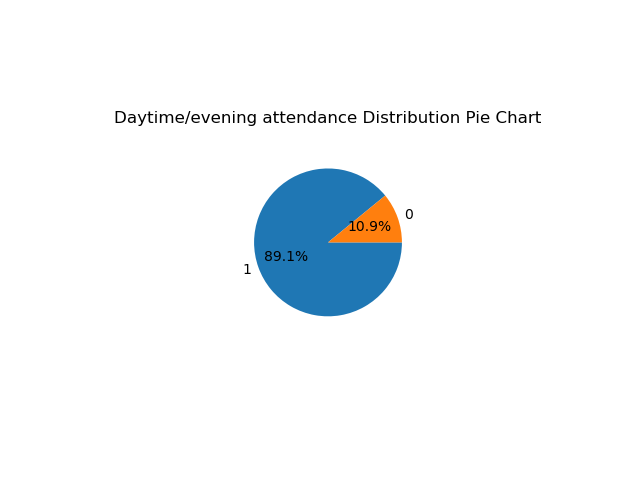

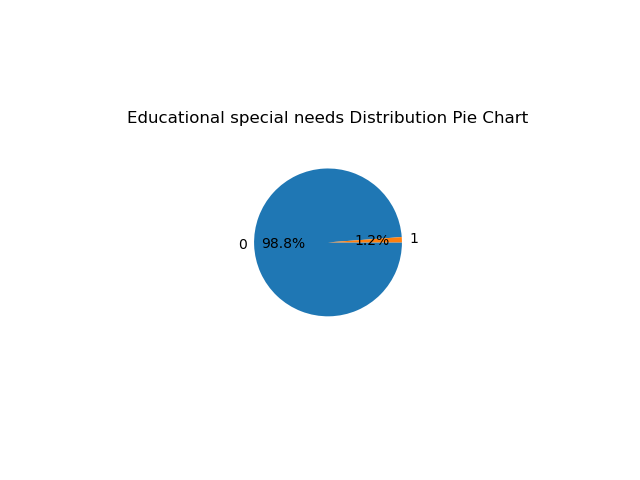

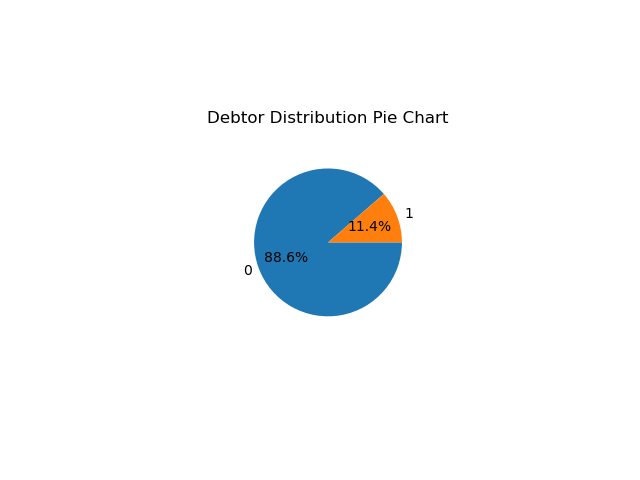

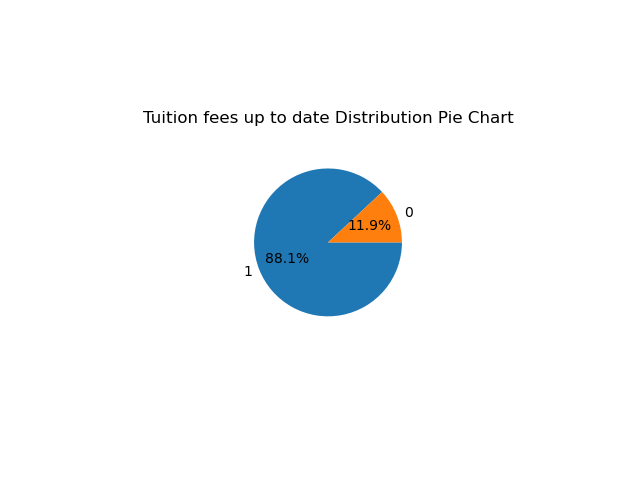

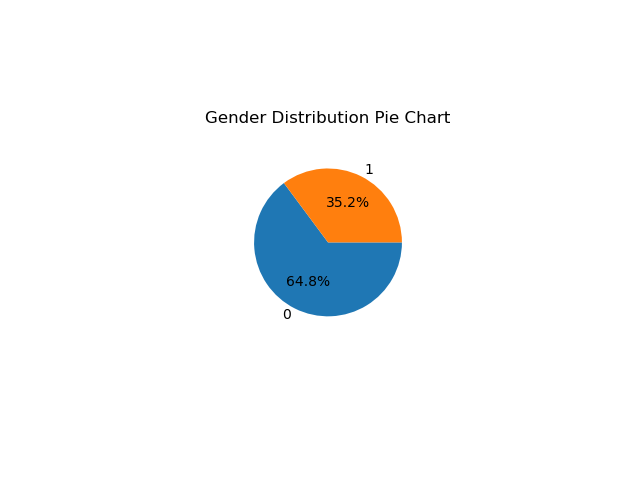

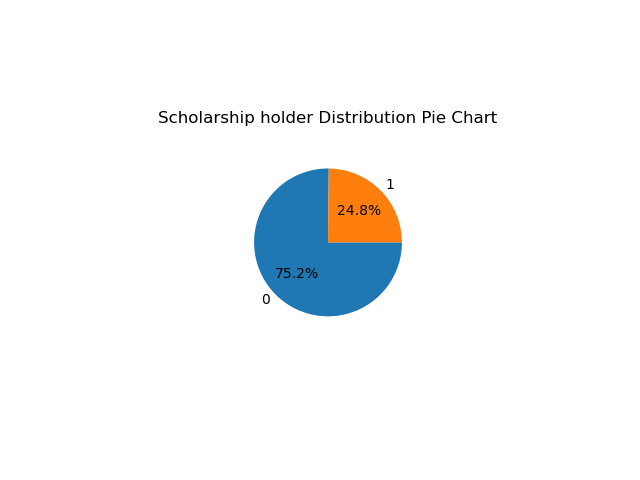

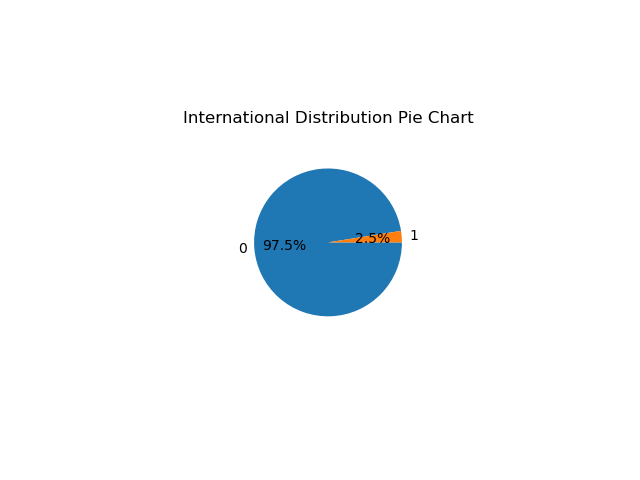

Pie charts displayed successfully.


<Figure size 640x480 with 0 Axes>

In [9]:
for feature in circle_features:
    # Count the occurrences of each category
    category_counts = df[feature].value_counts()

    # Create a pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=0, radius=0.5, counterclock=False)
    plt.title(f'{feature} Distribution Pie Chart', y=0.8)

    # Replace invalid characters with underscores
    feature_filename = feature.replace('/', '_')

    # Save the pie chart as an image
    image_filename = f'{feature_filename}_pie_chart.png'
    plt.savefig(image_filename)

    # Clear the current figure for the next iteration
    plt.clf()

    # Open and display the saved image using PIL
    img = Image.open(image_filename)
    display(img)

print("Pie charts displayed successfully.")

# Student Information: #  
Pie charts:  
Marital status  
Previous qualification  
Nationality  
Displaced  
Educational special needs  
Gender  
International  
  
Histograms:  
Application mode  
Age at enrollment  
  
Honorable Mention:  
Application mode  
Application order

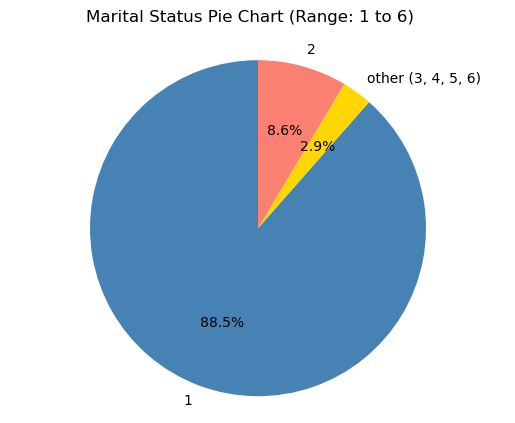

In [10]:
# Marital status pie chart
labels = ['1', 'other (3, 4, 5, 6)', '2']
sizes = [88.6, 2.9, 8.6]  # Values representing the portions of the pie chart
colors = ['steelblue', 'gold', 'salmon']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, radius=0.5, counterclock=True)
plt.axis('equal')
plt.suptitle('Marital Status Pie Chart (Range: 1 to 6)', y=0.95)
plt.savefig('marital_status.png')
plt.show()

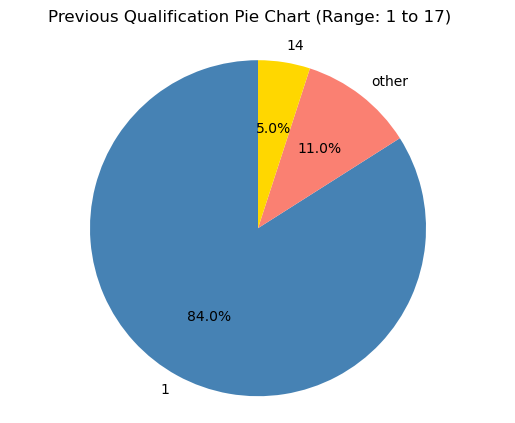

In [11]:
# Previous qualification pie chart
labels = ['1', 'other', '14']
sizes = [84, 11, 5]  # Values representing the portions of the pie chart
colors = ['steelblue', 'salmon', 'gold']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, radius=0.5, counterclock=True)
plt.axis('equal')
plt.suptitle('Previous Qualification Pie Chart (Range: 1 to 17)', y=0.95)
plt.savefig('previous_qualification.png')
plt.show()

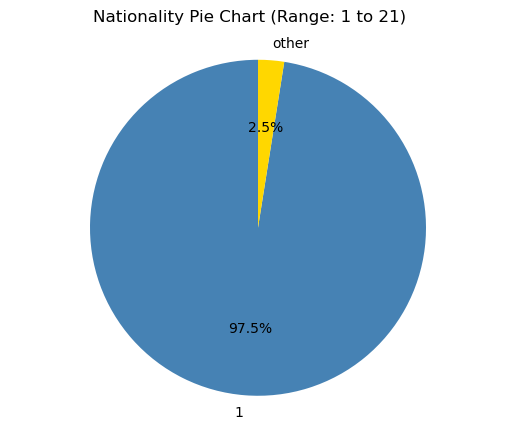

In [12]:
# Nationality pie chart
labels = ['1', 'other']
sizes = [97.5, 2.5]  # Values representing the portions of the pie chart
colors = ['steelblue', 'gold']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, radius=0.5, counterclock=True)
plt.axis('equal')
plt.suptitle('Nationality Pie Chart (Range: 1 to 21)', y=0.95)
plt.savefig('nationality.png')
plt.show()

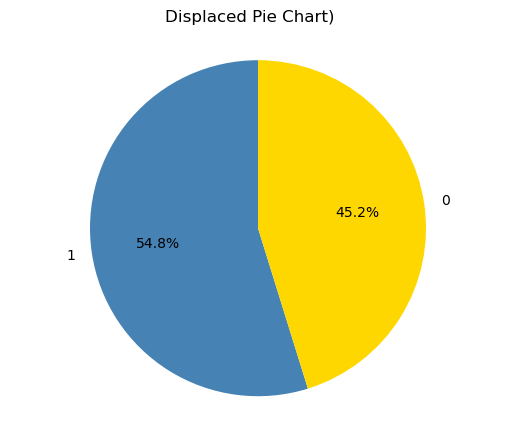

In [13]:
# Displaced pie chart
labels = ['1', '0']
sizes = [54.8, 45.2]  # Values representing the portions of the pie chart
colors = ['steelblue', 'gold']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, radius=0.5, counterclock=True)
plt.axis('equal')
plt.suptitle('Displaced Pie Chart)', y=0.95)
plt.savefig('displaced.png')
plt.show()

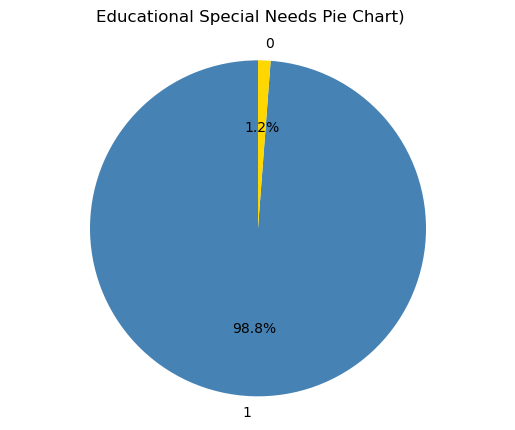

In [14]:
# Educational special needs pie chart
labels = ['1', '0']
sizes = [98.8, 1.2]  # Values representing the portions of the pie chart
colors = ['steelblue', 'gold']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, radius=0.5, counterclock=True)
plt.axis('equal')
plt.suptitle('Educational Special Needs Pie Chart)', y=0.95)
plt.savefig('displaced.png')
plt.show()

In [15]:
# Student info binary pie charts
student_binary_info = df[['Displaced', 'Educational special needs', 'Gender', 'International']]

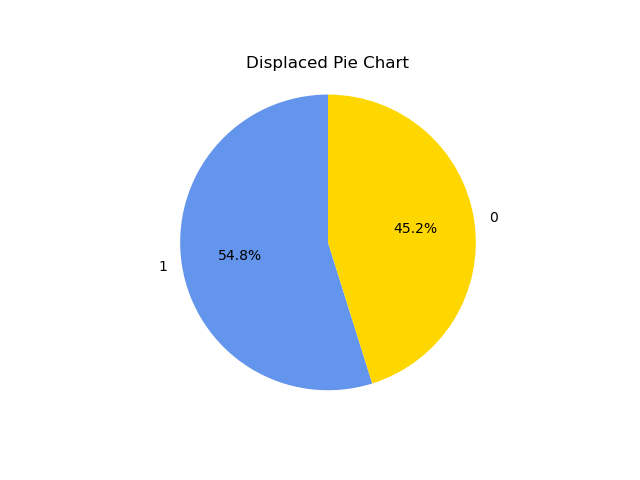

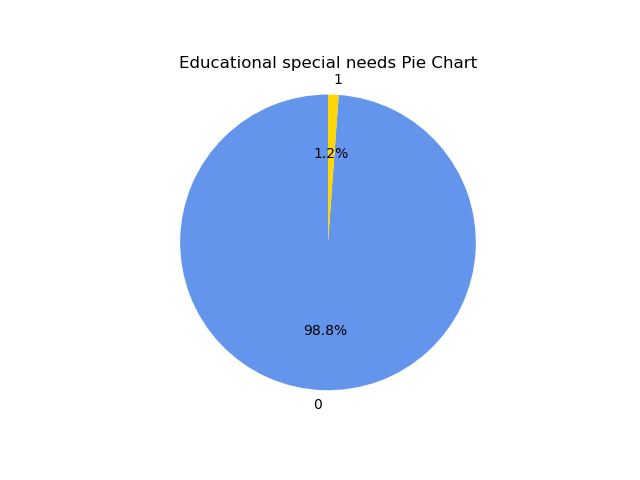

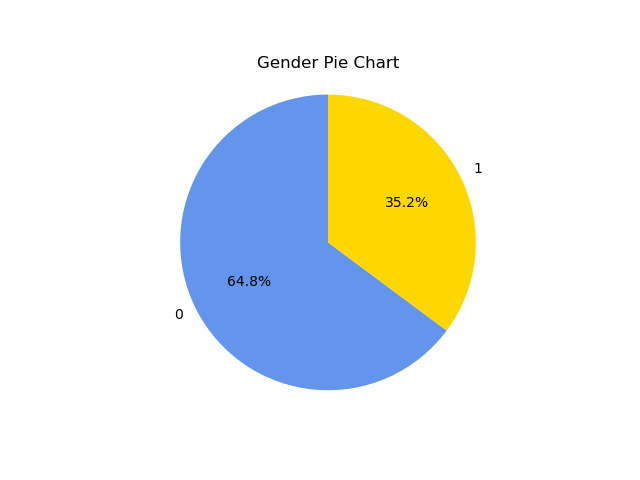

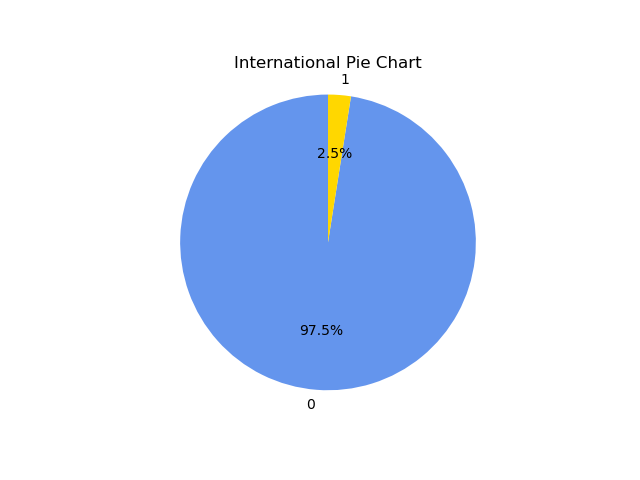

Pie charts displayed successfully.


<Figure size 640x480 with 0 Axes>

In [16]:
for feature in student_binary_info:
    category_counts = df[feature].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, counterclock=True, colors=['cornflowerblue', 'gold'])
    plt.title(f'{feature} Pie Chart', y=0.95)
    feature_filename = feature.replace('/', '_')
    image_filename = f'{feature_filename}.png'
    plt.savefig(image_filename)

    # Clear the current figure for the next iteration
    plt.clf()

    # Open and display the saved image using PIL
    img = Image.open(image_filename)
    display(img)

print("Pie charts displayed successfully.")

# Parent Information: #  
Mother's qualification  
Father's qualification  
Mother's occupation  
Father's occupation  

In [17]:
target_feature = "Target"

# Get unique categories from the target feature
target_categories = df[target_feature].unique()

# Create a dictionary to map target categories to colors
category_colors = {
    target_categories[0]: 'red',
    target_categories[1]: 'green',
    target_categories[2]: 'yellow'
}

In [18]:
parent_data = {
    "Mother's Qualification": df["Mother's qualification"],
    "Father's Qualification": df["Father's qualification"],
    "Mother's Occupation": df["Mother's occupation"],
    "Father's Occupation": df["Father's occupation"]
}
parent_colors = {
    "Mother's Qualification": 'lightcoral',
    "Father's Qualification": 'lightskyblue',
    "Mother's Occupation": 'lightcoral',
    "Father's Occupation": 'lightskyblue'
}

<Figure size 1000x600 with 0 Axes>

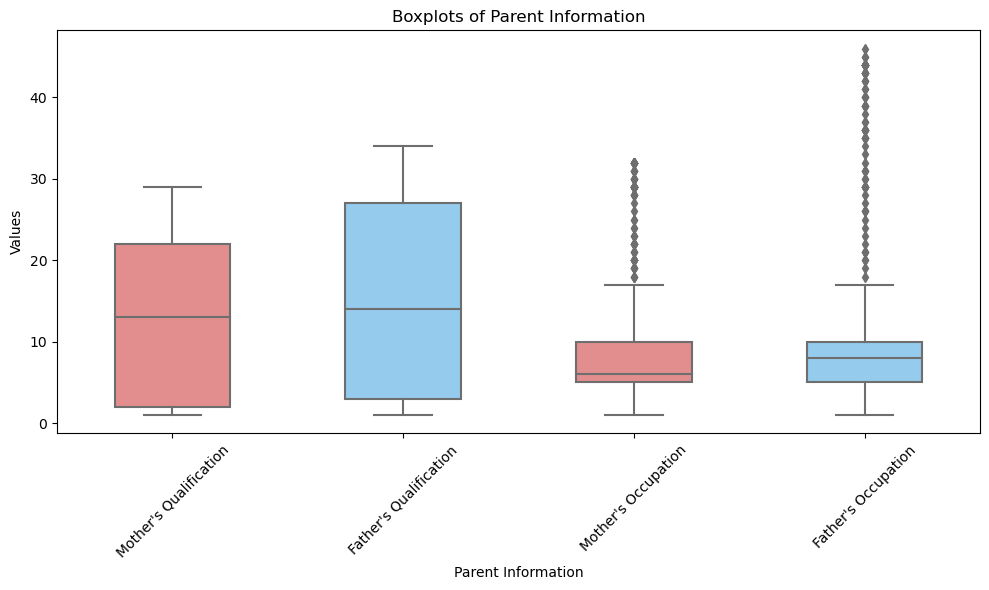

In [19]:
# Boxplots for Parent Information
plt.figure(figsize=(10, 6))
custom_palette = ['lightcoral', 'lightskyblue']

# Create a DataFrame
parent_df = pd.DataFrame(parent_data)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=parent_df, width=0.5, palette=parent_colors)

# Add a title and labels
plt.title('Boxplots of Parent Information')
plt.xlabel('Parent Information')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('parent_information_boxplots.png')
plt.tight_layout()
plt.show()

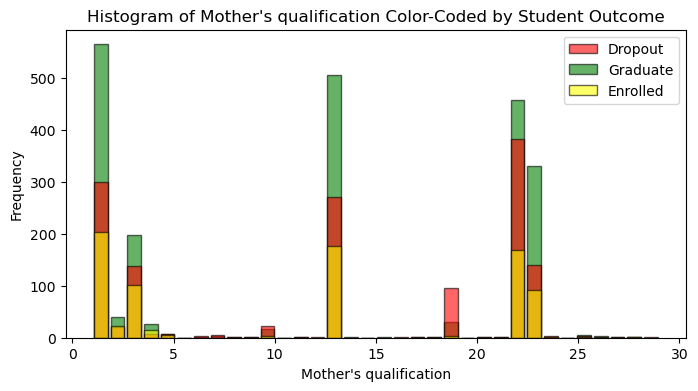

In [20]:
# Histogram for "Mother's qualification"
feature_to_plot = "Mother's qualification"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=34)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('mothers_qualification_by_target.png')
plt.show()

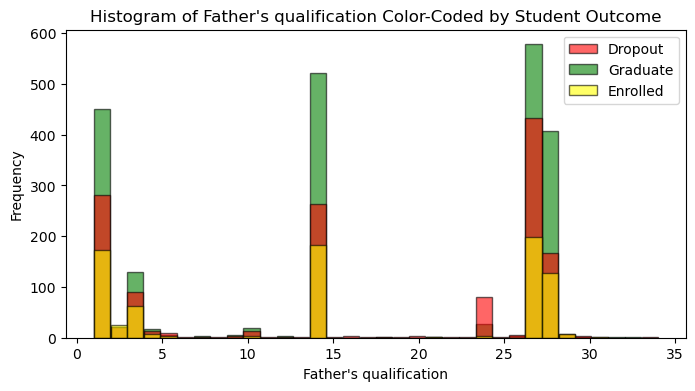

In [21]:
# Histogram for "Father's qualification"
feature_to_plot = "Father's qualification"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=34)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('fathers_qualification_by_target.png')
plt.show()

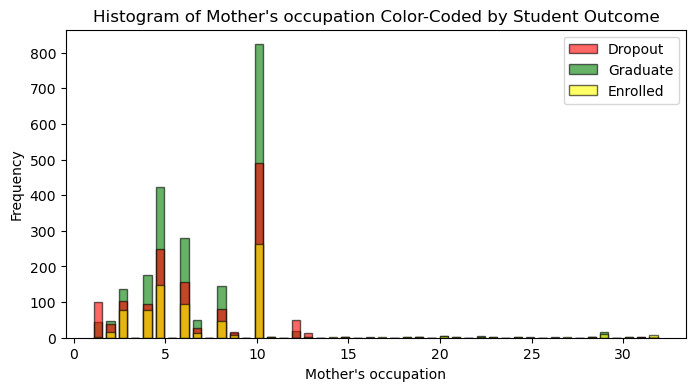

In [22]:
# Histogram for "Mother's occupation"
feature_to_plot = "Mother's occupation"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=46)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('mothers_qualification_by_target.png')
plt.show()

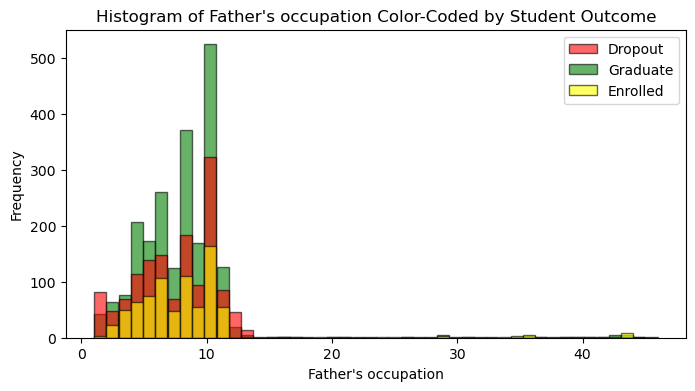

In [23]:
# Histogram for "Father's occupation"
feature_to_plot = "Father's occupation"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=46)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('fathers_qualification_by_target.png')
plt.show()

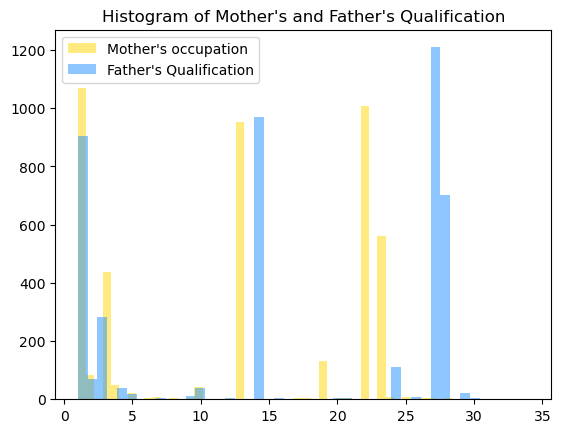

In [24]:
# Mother's and Father's qualification histograms on the same axis
plt.hist(df["Mother's qualification"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Father's qualification"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Mother's and Father's Qualification")
plt.legend(["Mother's occupation", "Father's Qualification"])
plt.savefig('mothers_fathers_qualification.png')
plt.show()

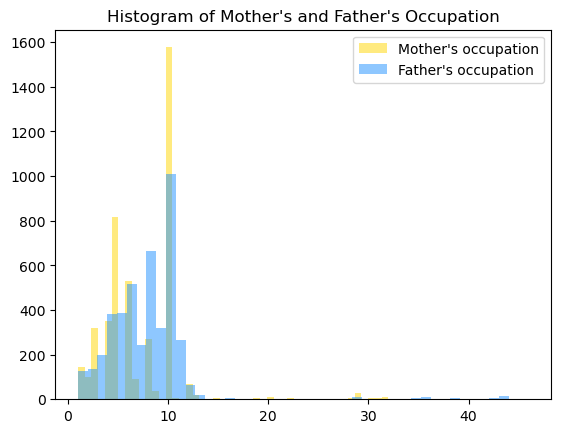

In [25]:
# Mother's and Father's Occupation histograms on the same axis
plt.hist(df["Mother's occupation"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Father's occupation"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Mother's and Father's Occupation")
plt.legend(["Mother's occupation", "Father's occupation"])
plt.savefig('mothers_fathers_occupation.png')
plt.show()

# Economic Information: #  
Pie Charts:  
Debtor  
Tuition fees up to date  
Scholarship holder  
  
Box Plots:  
Unemployment rate  
Inflation rate  
GPD  

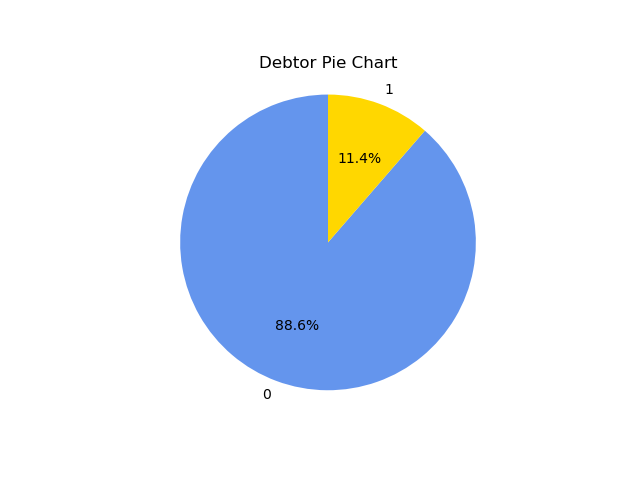

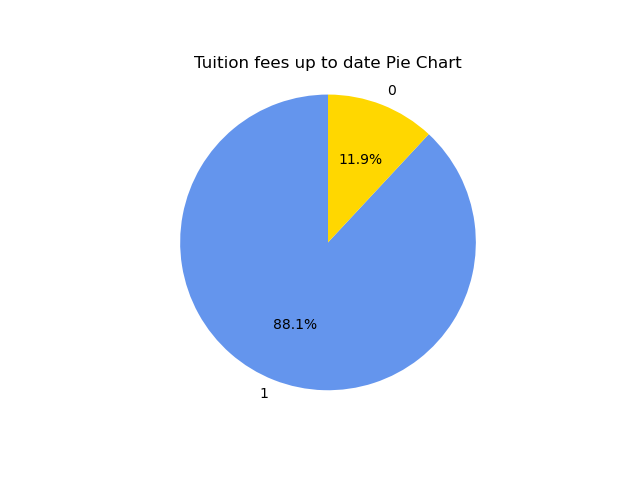

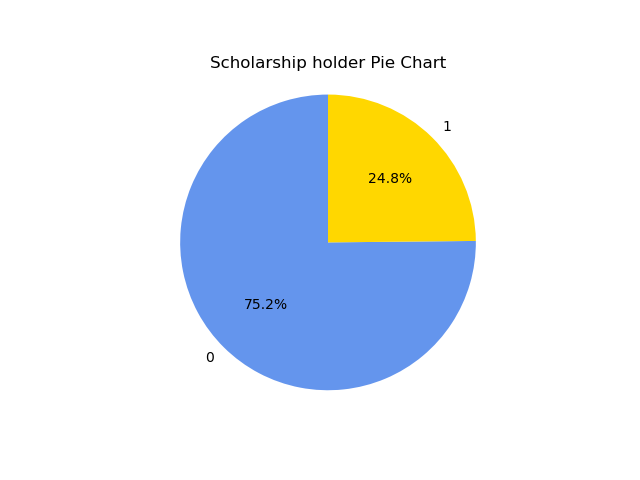

Pie charts displayed successfully.


<Figure size 640x480 with 0 Axes>

In [26]:
# Economic info pie charts
economic_pie = df[['Debtor', 'Tuition fees up to date', 'Scholarship holder']]

for feature in economic_pie:
    category_counts = df[feature].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, counterclock=True, colors=['cornflowerblue', 'gold'])
    plt.title(f'{feature} Pie Chart', y=0.95)
    feature_filename = feature.replace('/', '_')
    image_filename = f'{feature_filename}.png'
    plt.savefig(image_filename)

    # Clear the current figure for the next iteration
    plt.clf()

    # Open and display the saved image using PIL
    img = Image.open(image_filename)
    display(img)

print("Pie charts displayed successfully.")

<Figure size 1000x600 with 0 Axes>

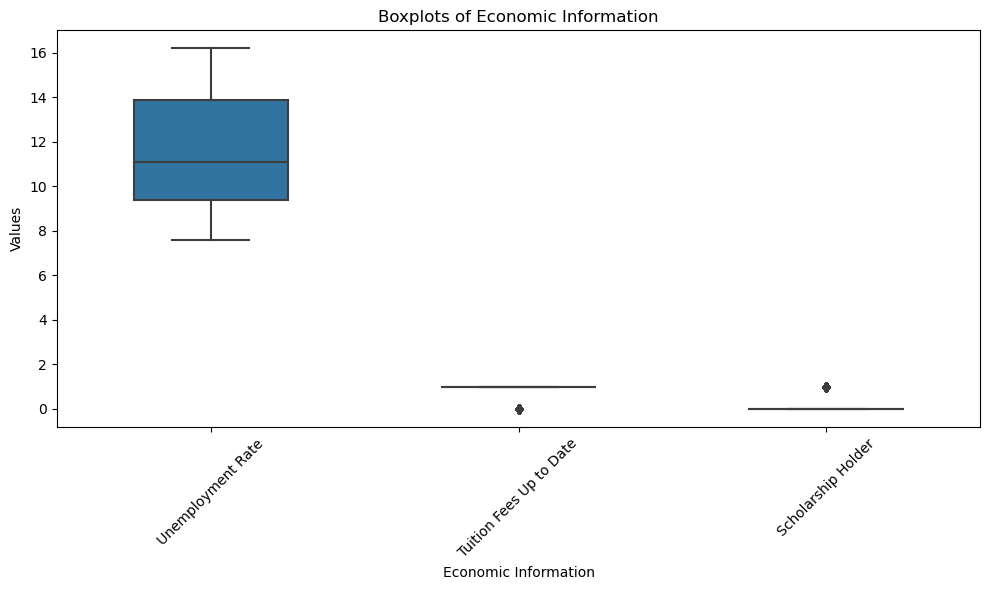

In [27]:
# Economic box plots
economic_data = {
    "Unemployment Rate": df["Unemployment rate"],
    "Tuition Fees Up to Date": df["Tuition fees up to date"],
    "Scholarship Holder": df["Scholarship holder"]
}

# Boxplots for Economic Information
plt.figure(figsize=(10, 6))

# Create a DataFrame
economic_df = pd.DataFrame(economic_data)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=economic_df, width=0.5)

# Add a title and labels
plt.title('Boxplots of Economic Information')
plt.xlabel('Economic Information')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('economic_information_boxplots.png')
plt.tight_layout()
plt.show()

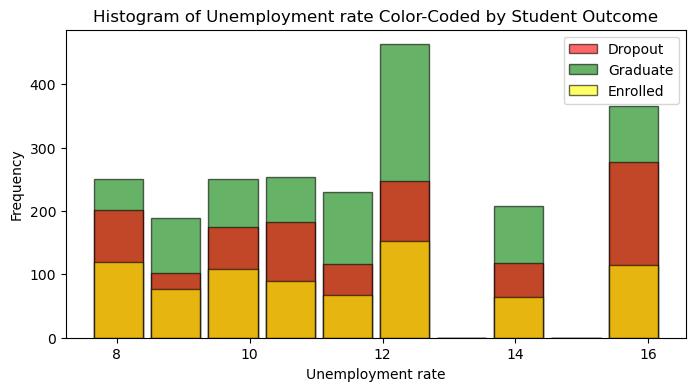

In [28]:
# Histogram for "Unemployment rate"
feature_to_plot = "Unemployment rate"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=10)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('unemployment_rate_by_target.png')
plt.show()

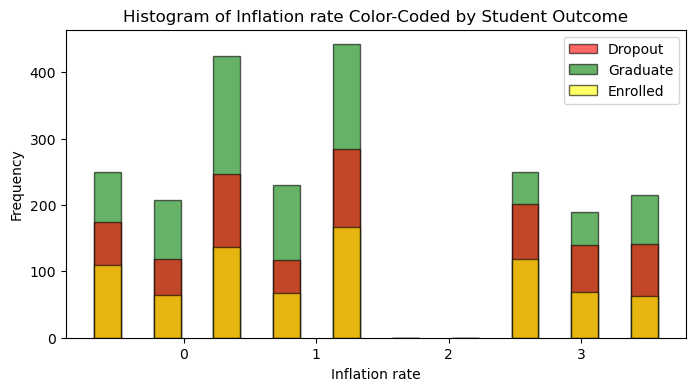

In [29]:
# Histogram for "Inflation"
feature_to_plot = "Inflation rate"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=10)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('Inflation_rate_by_target.png')
plt.show()

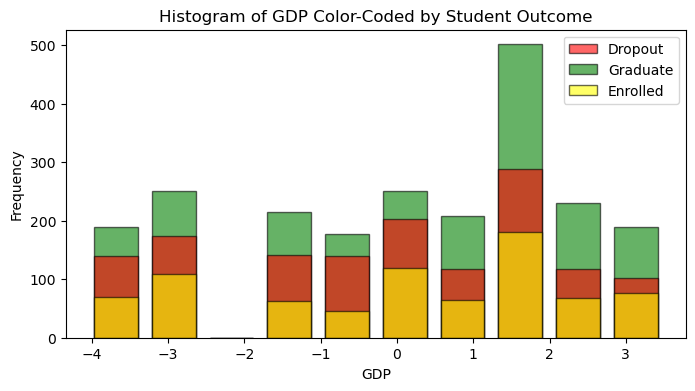

In [30]:
# Histogram for "GDP"
feature_to_plot = "GDP"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=10)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('gdp_by_target.png')
plt.show()

# Academic Standing: #
Course  
Curricular units 1st sem (credited)  
Curricular units 1st sem (enrolled)  
Curricular units 1st sem (evaluations)  
Curricular units 1st sem (approved)  
Curricular units 1st sem (grade)  
Curricular units 1st sem (without evaluations)  
Curricular units 2nd sem (credited)  
Curricular units 2nd sem (enrolled)  
Curricular units 2nd sem (evaluations)  
Curricular units 2nd sem (approved)  
Curricular units 2nd sem (grade)  
Curricular units 2nd sem (without evaluations)

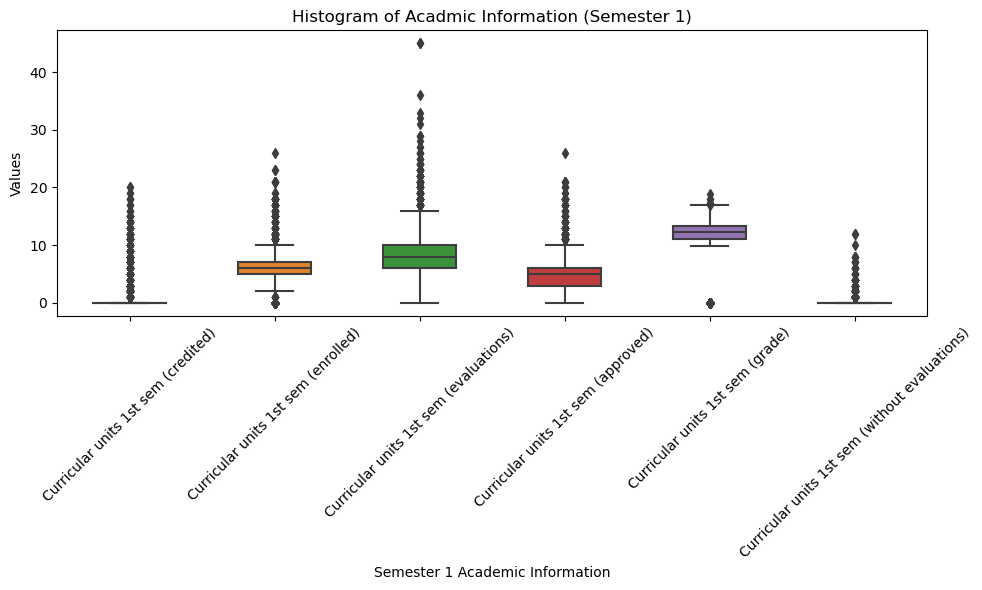

In [32]:
# Academic 1st Semester box plots
academic_data1 = {
    "Curricular units 1st sem (credited)": df["Curricular units 1st sem (credited)"],
    "Curricular units 1st sem (enrolled)": df["Curricular units 1st sem (enrolled)"],
    "Curricular units 1st sem (evaluations)": df["Curricular units 1st sem (evaluations)"],
    "Curricular units 1st sem (approved)": df["Curricular units 1st sem (approved)"],
    "Curricular units 1st sem (grade)": df["Curricular units 1st sem (grade)"],
    "Curricular units 1st sem (without evaluations)": df["Curricular units 1st sem (without evaluations)"],
}

# Boxplots for Academic Information Semester 1
plt.figure(figsize=(10, 6))

# Create a DataFrame
academic_df = pd.DataFrame(academic_data1)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df, width=0.5)

# Add a title and labels
plt.title('Histogram of Acadmic Information (Semester 1)')
plt.xlabel('Semester 1 Academic Information')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('academic_information_sem1_boxplots.png')
plt.tight_layout()
plt.show()

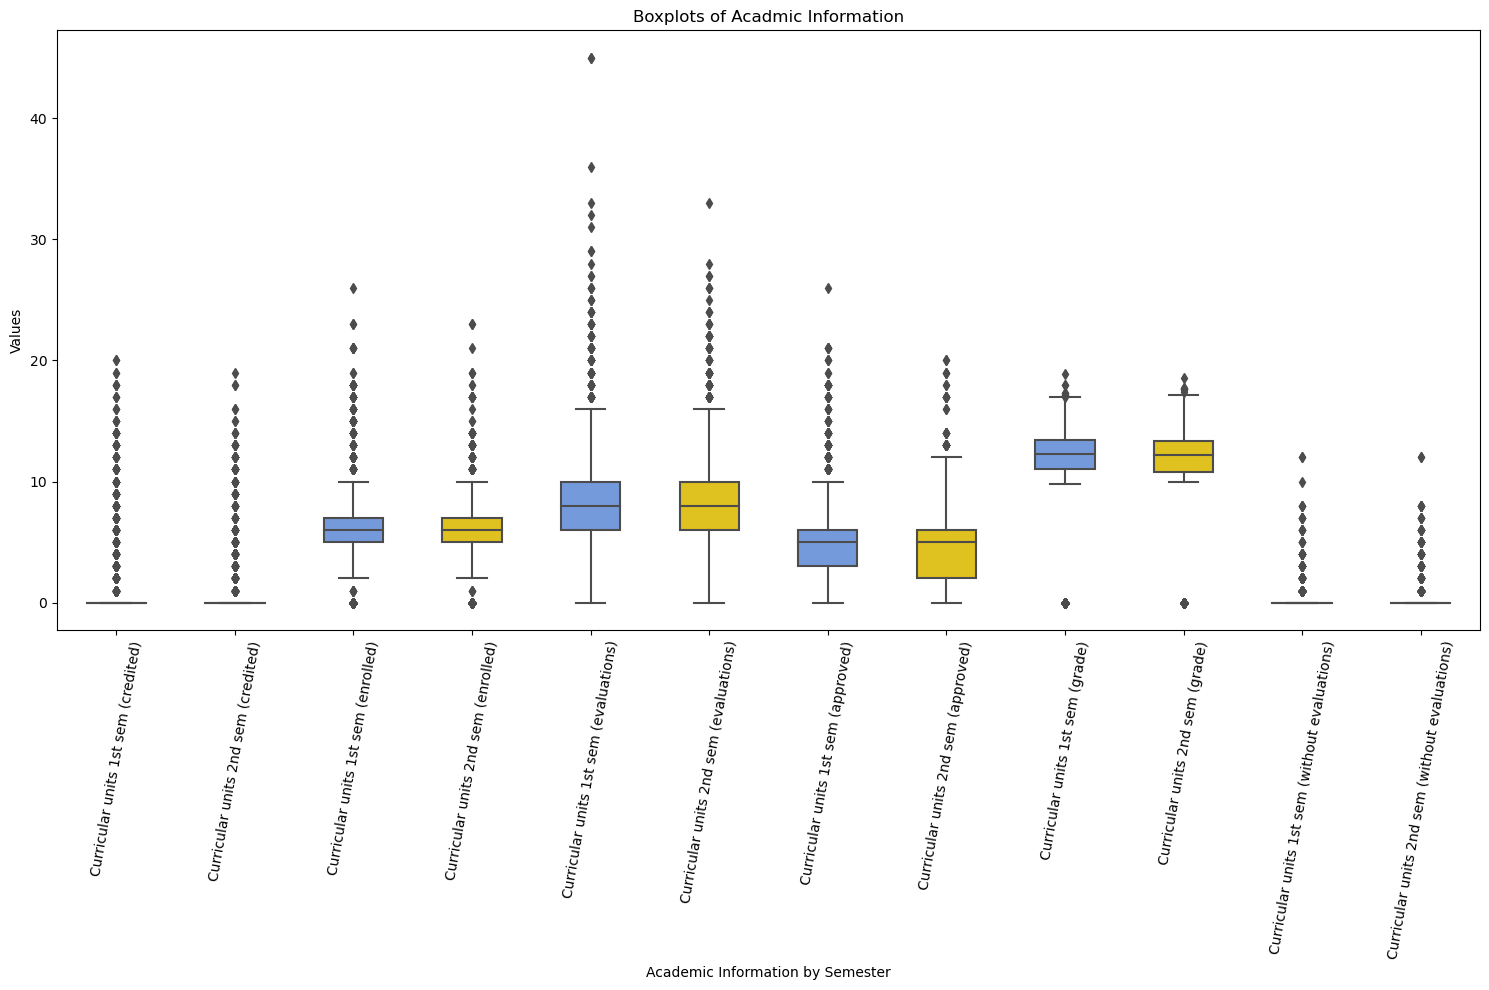

In [34]:
# Academic box plots
academic_data = {
    "Curricular units 1st sem (credited)": df["Curricular units 1st sem (credited)"],
    "Curricular units 2nd sem (credited)": df["Curricular units 2nd sem (credited)"],
    "Curricular units 1st sem (enrolled)": df["Curricular units 1st sem (enrolled)"],
    "Curricular units 2nd sem (enrolled)": df["Curricular units 2nd sem (enrolled)"],
    "Curricular units 1st sem (evaluations)": df["Curricular units 1st sem (evaluations)"],
    "Curricular units 2nd sem (evaluations)": df["Curricular units 2nd sem (evaluations)"],
    "Curricular units 1st sem (approved)": df["Curricular units 1st sem (approved)"],
    "Curricular units 2nd sem (approved)": df["Curricular units 2nd sem (approved)"],
    "Curricular units 1st sem (grade)": df["Curricular units 1st sem (grade)"],
    "Curricular units 2nd sem (grade)": df["Curricular units 2nd sem (grade)"],
    "Curricular units 1st sem (without evaluations)": df["Curricular units 1st sem (without evaluations)"],
    "Curricular units 2nd sem (without evaluations)": df["Curricular units 2nd sem (without evaluations)"]
}

academic_colors = {
    "Curricular units 1st sem (credited)": 'cornflowerblue',
    "Curricular units 2nd sem (credited)": 'gold',
    "Curricular units 1st sem (enrolled)": 'cornflowerblue',
    "Curricular units 2nd sem (enrolled)": 'gold',
    "Curricular units 1st sem (evaluations)": 'cornflowerblue',
    "Curricular units 2nd sem (evaluations)": 'gold',
    "Curricular units 1st sem (approved)": 'cornflowerblue',
    "Curricular units 2nd sem (approved)": 'gold',
    "Curricular units 1st sem (grade)": 'cornflowerblue',
    "Curricular units 2nd sem (grade)": 'gold',
    "Curricular units 1st sem (without evaluations)": 'cornflowerblue',
    "Curricular units 2nd sem (without evaluations)": 'gold'
}

# Boxplots for Academic Information
plt.figure(figsize=(15, 10))
custom_palette = academic_colors

# Create a DataFrame
academic_df = pd.DataFrame(academic_data)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df, width=0.5, palette=academic_colors)

# Add a title and labels
plt.title('Boxplots of Acadmic Information')
plt.xlabel('Academic Information by Semester')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=80)

# Save and Show the plot
plt.savefig('academic_information_boxplots.png')
plt.tight_layout()
plt.show()

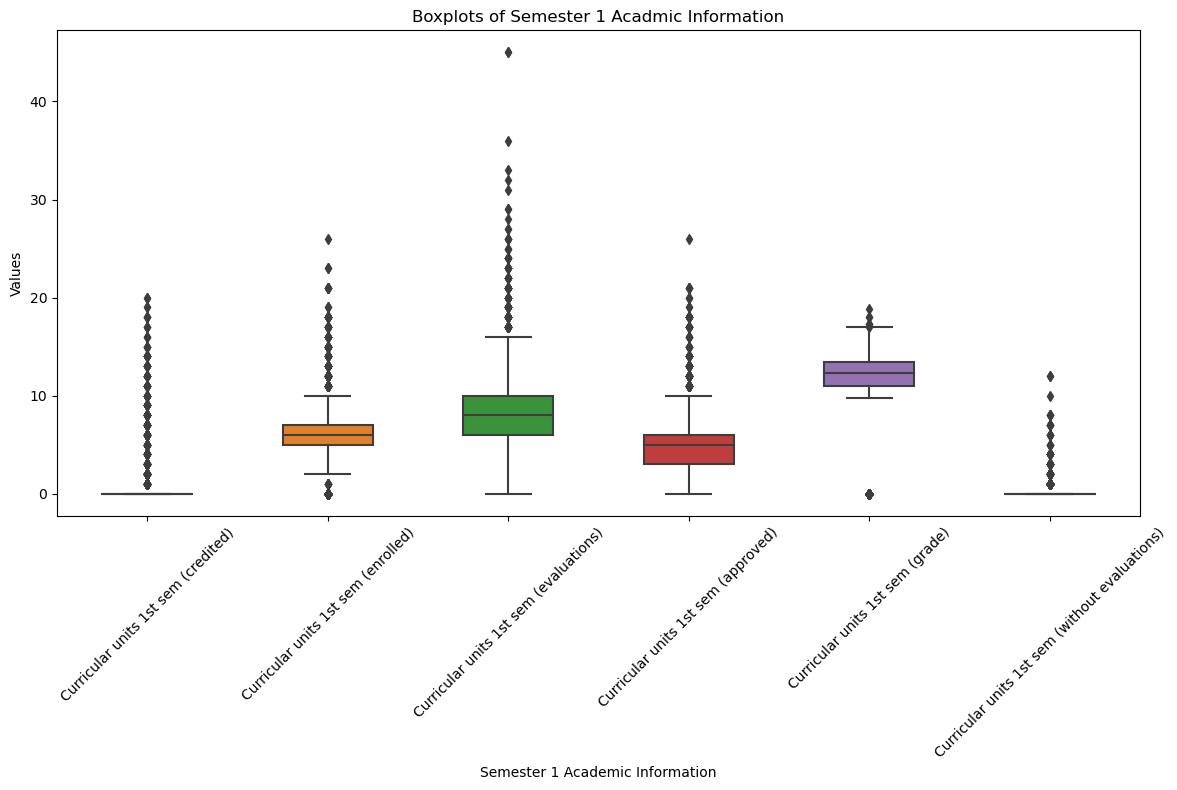

In [35]:
# Semester 1 Boxplots
academic_data1 = {
    "Curricular units 1st sem (credited)": df["Curricular units 1st sem (credited)"],
    "Curricular units 1st sem (enrolled)": df["Curricular units 1st sem (enrolled)"],
    "Curricular units 1st sem (evaluations)": df["Curricular units 1st sem (evaluations)"],
    "Curricular units 1st sem (approved)": df["Curricular units 1st sem (approved)"],
    "Curricular units 1st sem (grade)": df["Curricular units 1st sem (grade)"],
    "Curricular units 1st sem (without evaluations)": df["Curricular units 1st sem (without evaluations)"],
}

# Boxplots for Semester 1 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df1 = pd.DataFrame(academic_data1)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df1, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 Acadmic Information')
plt.xlabel('Semester 1 Academic Information')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('sem1_academic_information_boxplots.png')
plt.tight_layout()
plt.show()

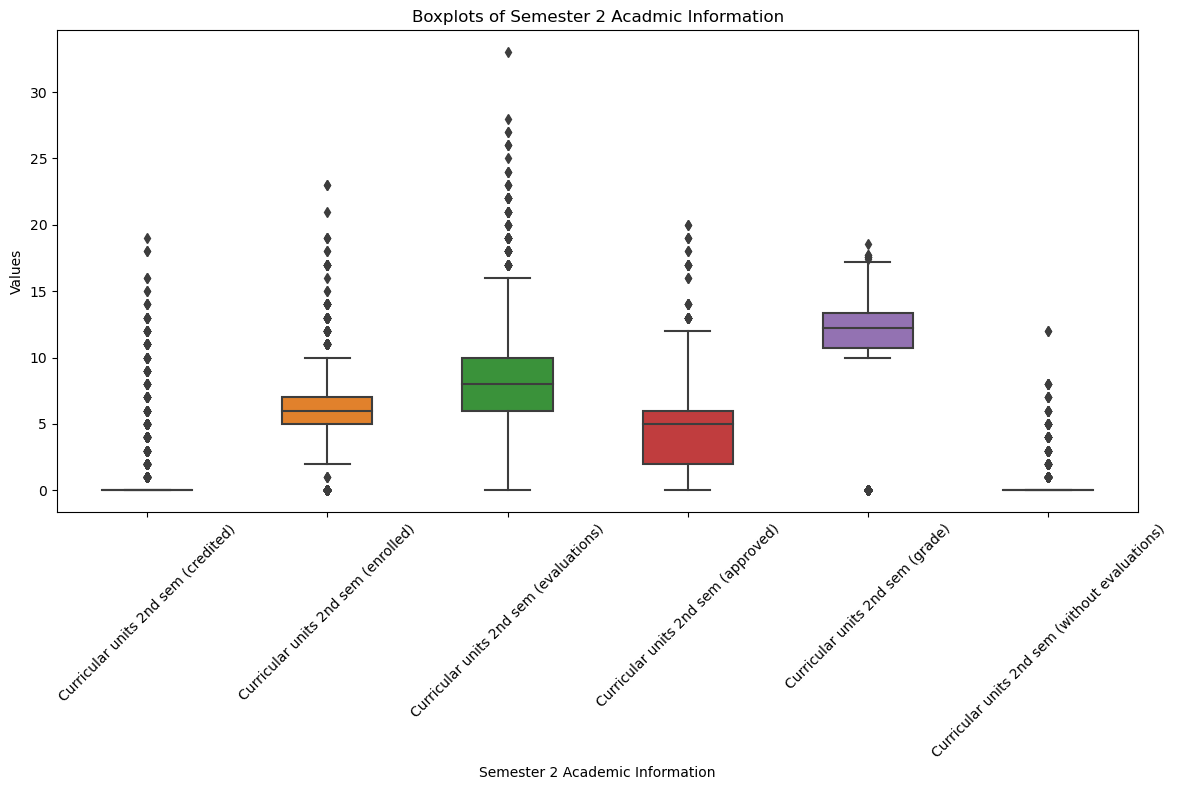

In [36]:
# Semester 2 Boxplots
academic_data2 = {
    "Curricular units 2nd sem (credited)": df["Curricular units 2nd sem (credited)"],
    "Curricular units 2nd sem (enrolled)": df["Curricular units 2nd sem (enrolled)"],
    "Curricular units 2nd sem (evaluations)": df["Curricular units 2nd sem (evaluations)"],
    "Curricular units 2nd sem (approved)": df["Curricular units 2nd sem (approved)"],
    "Curricular units 2nd sem (grade)": df["Curricular units 2nd sem (grade)"],
    "Curricular units 2nd sem (without evaluations)": df["Curricular units 2nd sem (without evaluations)"],
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df2 = pd.DataFrame(academic_data2)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df2, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 2 Acadmic Information')
plt.xlabel('Semester 2 Academic Information')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('sem2_academic_information_boxplots.png')
plt.tight_layout()
plt.show()

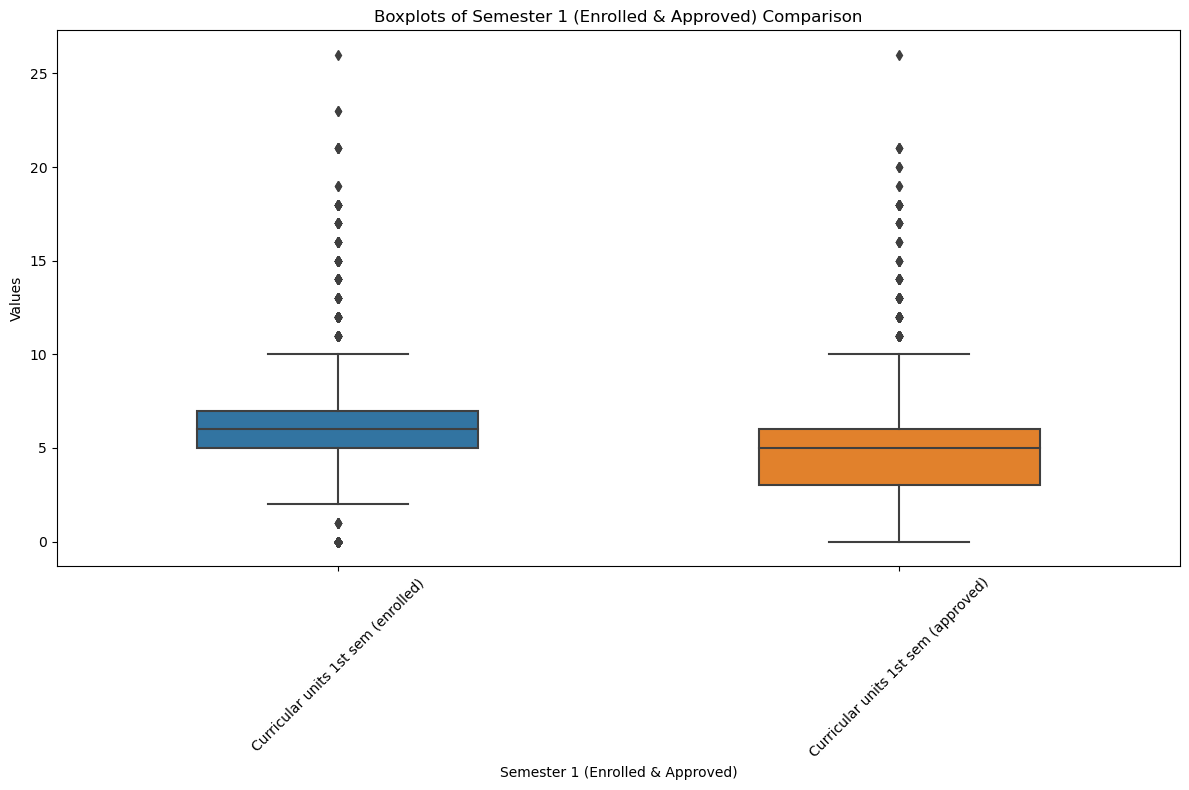

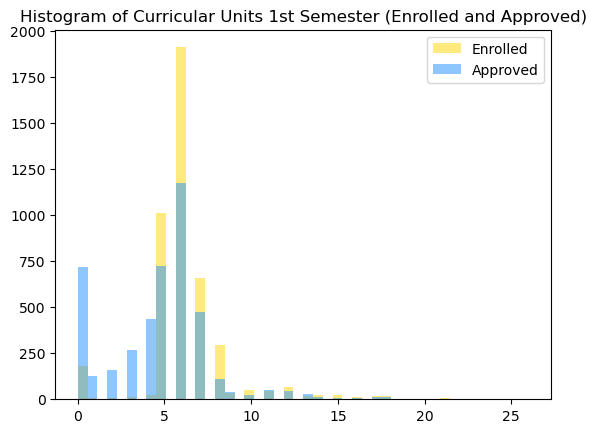

In [37]:
# Semester 1 Enrolled & Approved Boxplots
academic_data3 = {
    "Curricular units 1st sem (enrolled)": df["Curricular units 1st sem (enrolled)"],
    "Curricular units 1st sem (approved)": df["Curricular units 1st sem (approved)"]
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df3 = pd.DataFrame(academic_data3)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df3, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 (Enrolled & Approved) Comparison')
plt.xlabel('Semester 1 (Enrolled & Approved)')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('sem1_enrolled_approved_boxplots.png')
plt.tight_layout()
plt.show()

# 1st Semester enrolled and approved histograms on the same axis
plt.hist(df["Curricular units 1st sem (enrolled)"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Curricular units 1st sem (approved)"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Curricular Units 1st Semester (Enrolled and Approved)")
plt.legend(["Enrolled", "Approved"])
plt.savefig('sem1_enrolled_approved.png')
plt.show()

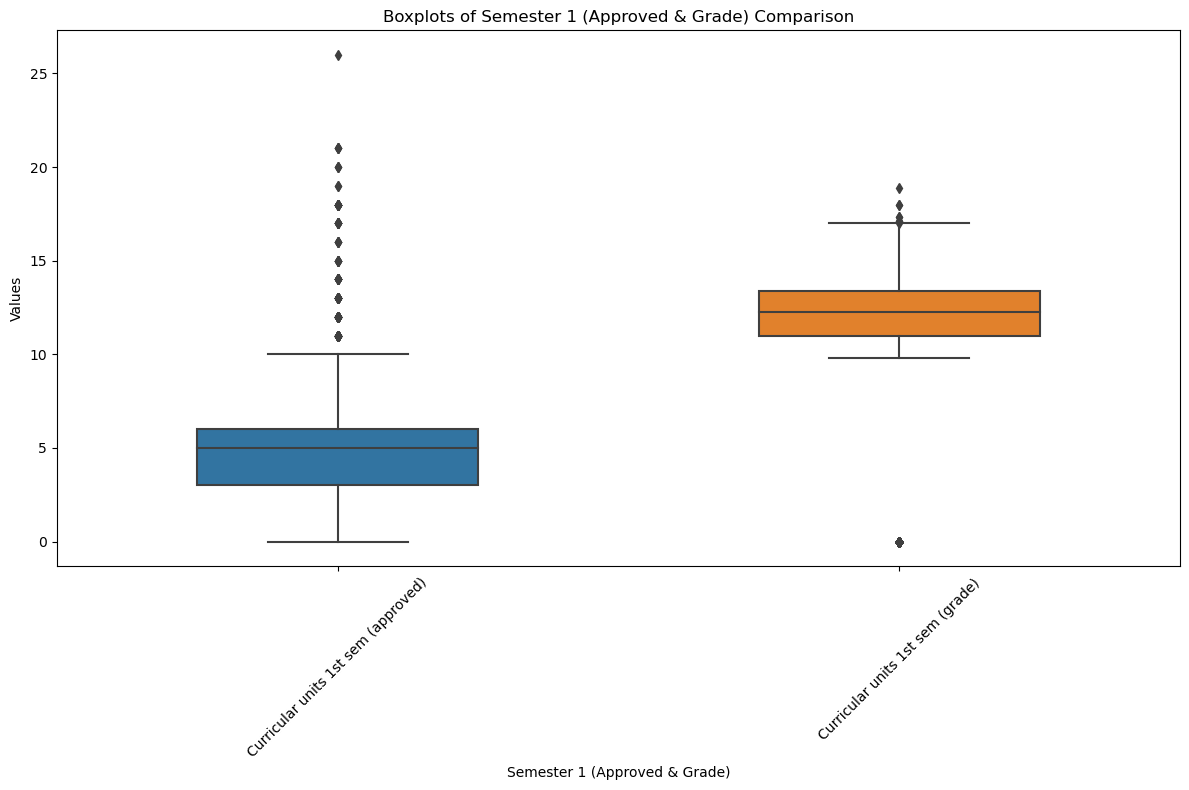

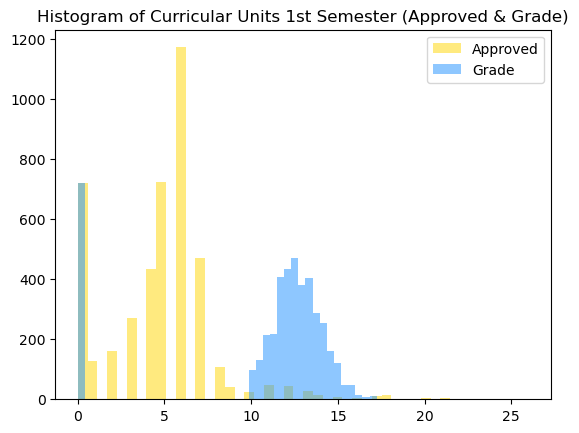

In [38]:
# Semester 1 Approved & Grade Boxplots
academic_data4 = {
    "Curricular units 1st sem (approved)": df["Curricular units 1st sem (approved)"],
    "Curricular units 1st sem (grade)": df["Curricular units 1st sem (grade)"]
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df4 = pd.DataFrame(academic_data4)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df4, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 (Approved & Grade) Comparison')
plt.xlabel('Semester 1 (Approved & Grade)')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('sem1_approved_grade_boxplots.png')
plt.tight_layout()
plt.show()

# 1st Semester enrolled and approved histograms on the same axis
plt.hist(df["Curricular units 1st sem (approved)"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Curricular units 1st sem (grade)"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Curricular Units 1st Semester (Approved & Grade)")
plt.legend(["Approved", "Grade"])
plt.savefig('sem1_approved_grade.png')
plt.show()

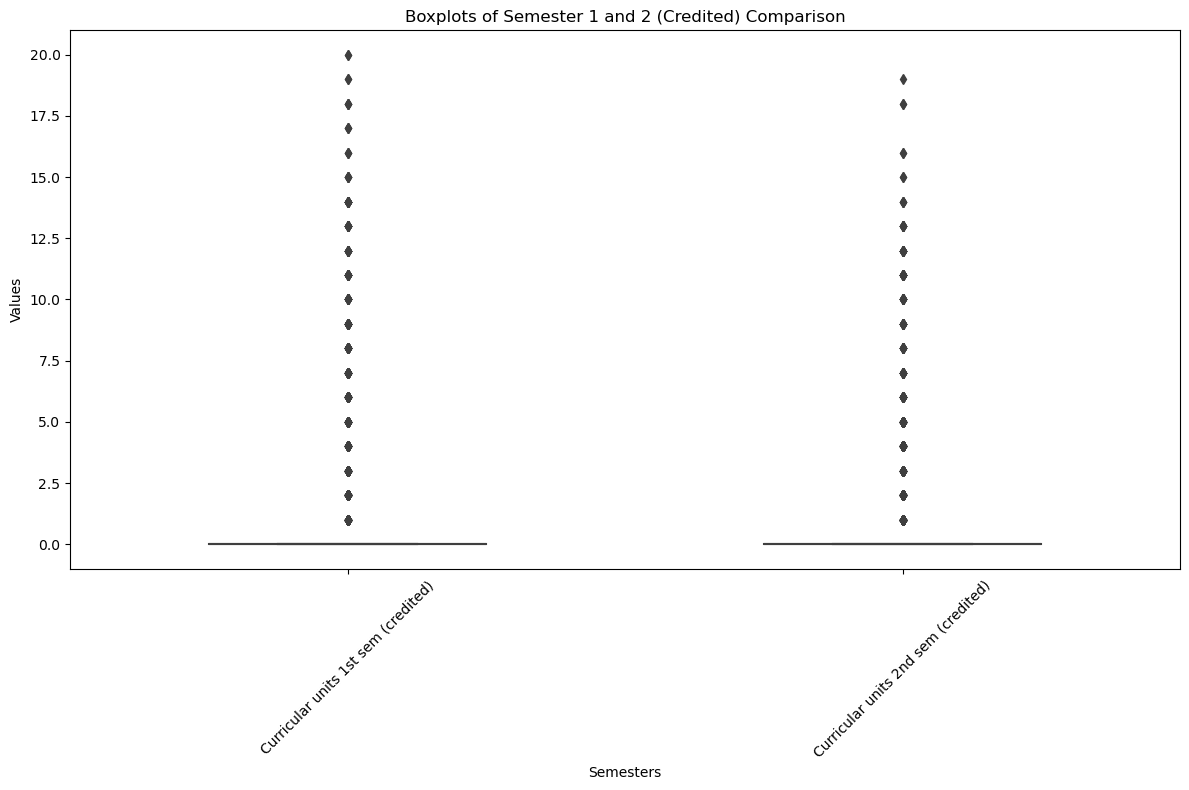

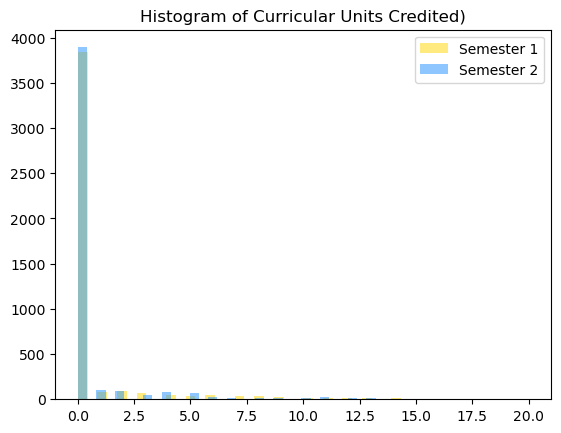

In [39]:
# Semester 1 and 2 (Credited) Boxplots
academic_data5 = {
    "Curricular units 1st sem (credited)": df["Curricular units 1st sem (credited)"],
    "Curricular units 2nd sem (credited)": df["Curricular units 2nd sem (credited)"]
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df5 = pd.DataFrame(academic_data5)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df5, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 and 2 (Credited) Comparison')
plt.xlabel('Semesters')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('credited_boxplots.png')
plt.tight_layout()
plt.show()

# 1st and 2nd Semester (credited) histograms on the same axis
plt.hist(df["Curricular units 1st sem (credited)"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Curricular units 2nd sem (credited)"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Curricular Units Credited)")
plt.legend(["Semester 1", "Semester 2"])
plt.savefig('credited.png')
plt.show()

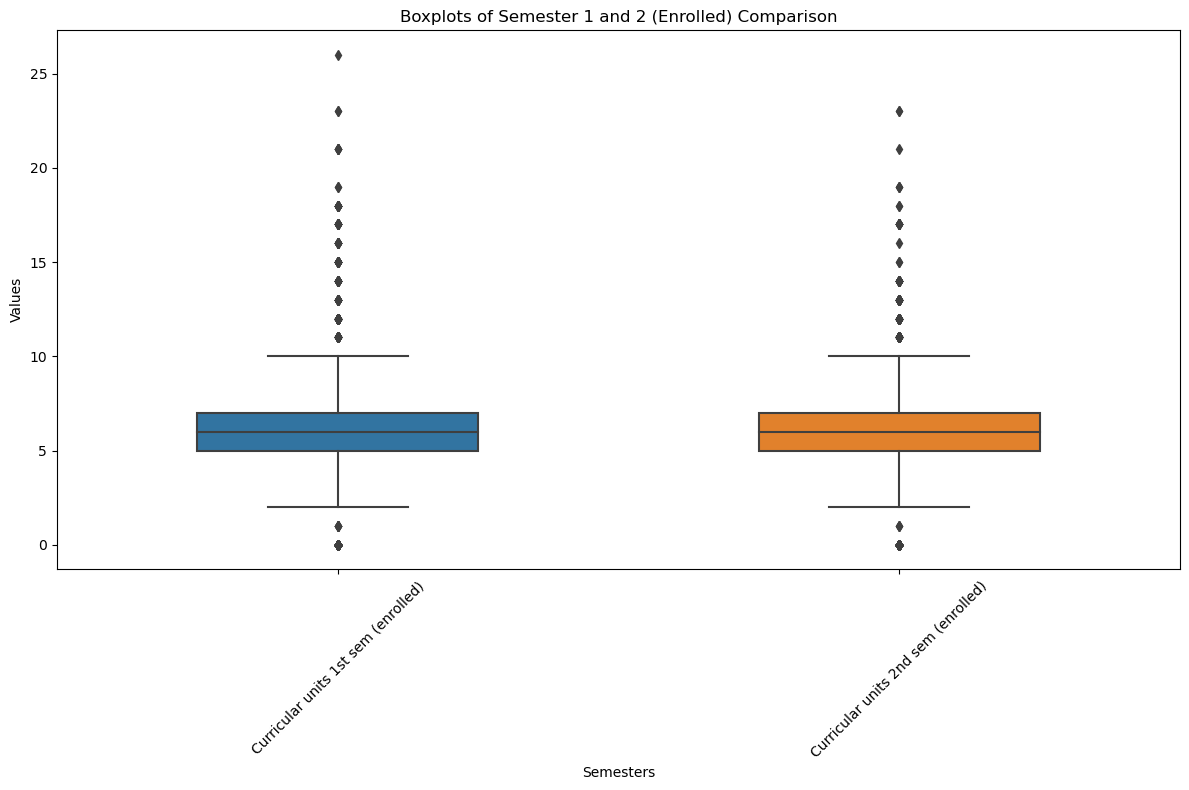

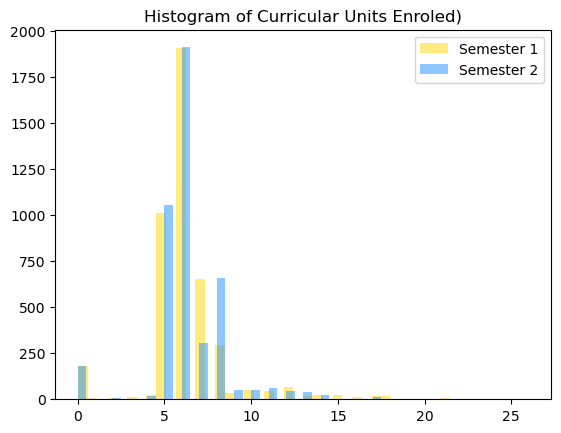

In [40]:
# Semester 1 and 2 (enrolled) Boxplots
academic_data6 = {
    "Curricular units 1st sem (enrolled)": df["Curricular units 1st sem (enrolled)"],
    "Curricular units 2nd sem (enrolled)": df["Curricular units 2nd sem (enrolled)"]
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df6 = pd.DataFrame(academic_data6)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df6, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 and 2 (Enrolled) Comparison')
plt.xlabel('Semesters')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('enrolled_boxplots.png')
plt.tight_layout()
plt.show()

# 1st and 2nd Semester (credited) histograms on the same axis
plt.hist(df["Curricular units 1st sem (enrolled)"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Curricular units 2nd sem (enrolled)"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Curricular Units Enroled)")
plt.legend(['Semester 1', 'Semester 2'])
plt.savefig('enrolled.png')
plt.show()

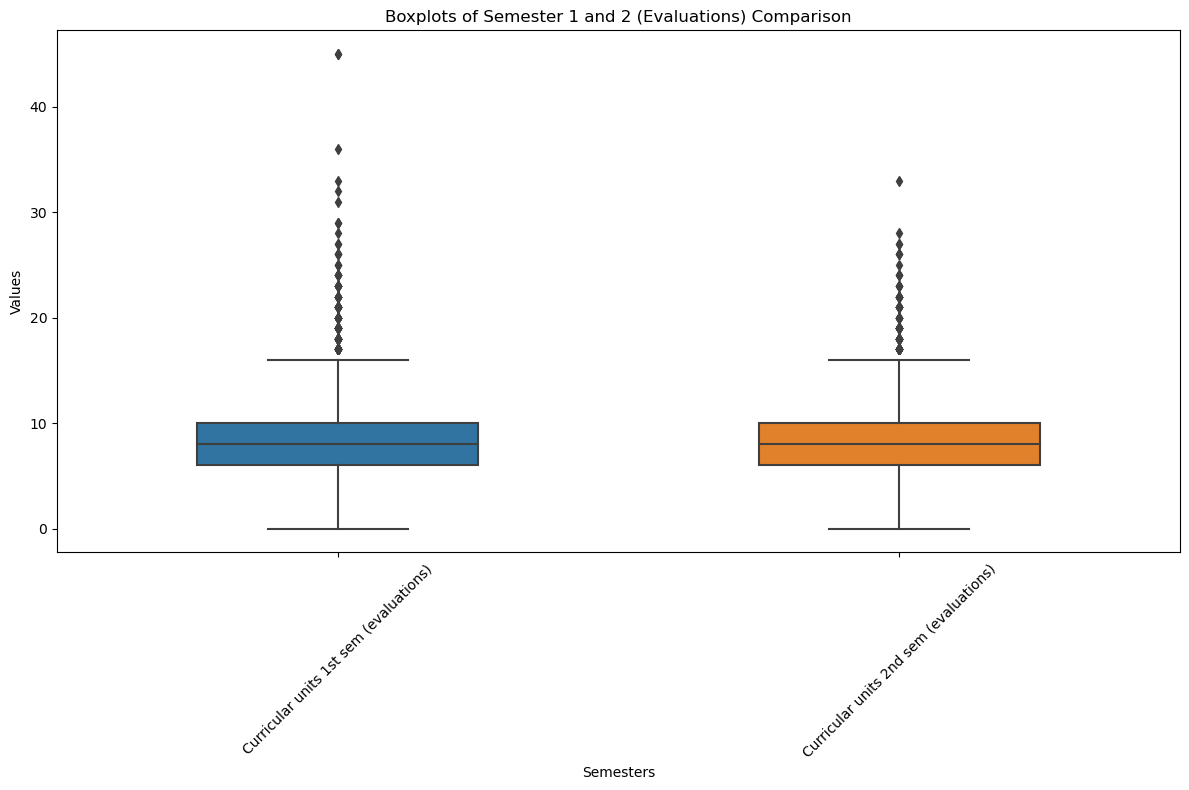

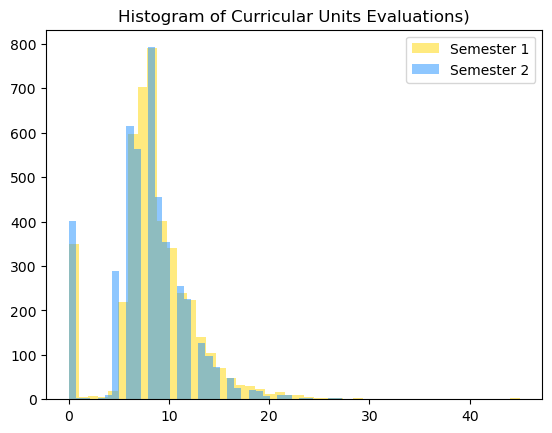

In [41]:
# Semester 1 and 2 (evaluations) Boxplots
academic_data7 = {
    "Curricular units 1st sem (evaluations)": df["Curricular units 1st sem (evaluations)"],
    "Curricular units 2nd sem (evaluations)": df["Curricular units 2nd sem (evaluations)"]
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df7 = pd.DataFrame(academic_data7)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df7, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 and 2 (Evaluations) Comparison')
plt.xlabel('Semesters')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('evaluations_boxplots.png')
plt.tight_layout()
plt.show()

# 1st and 2nd Semester (evaluations) histograms on the same axis
plt.hist(df["Curricular units 1st sem (evaluations)"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Curricular units 2nd sem (evaluations)"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Curricular Units Evaluations)")
plt.legend(['Semester 1', 'Semester 2'])
plt.savefig('evaluations.png')
plt.show()

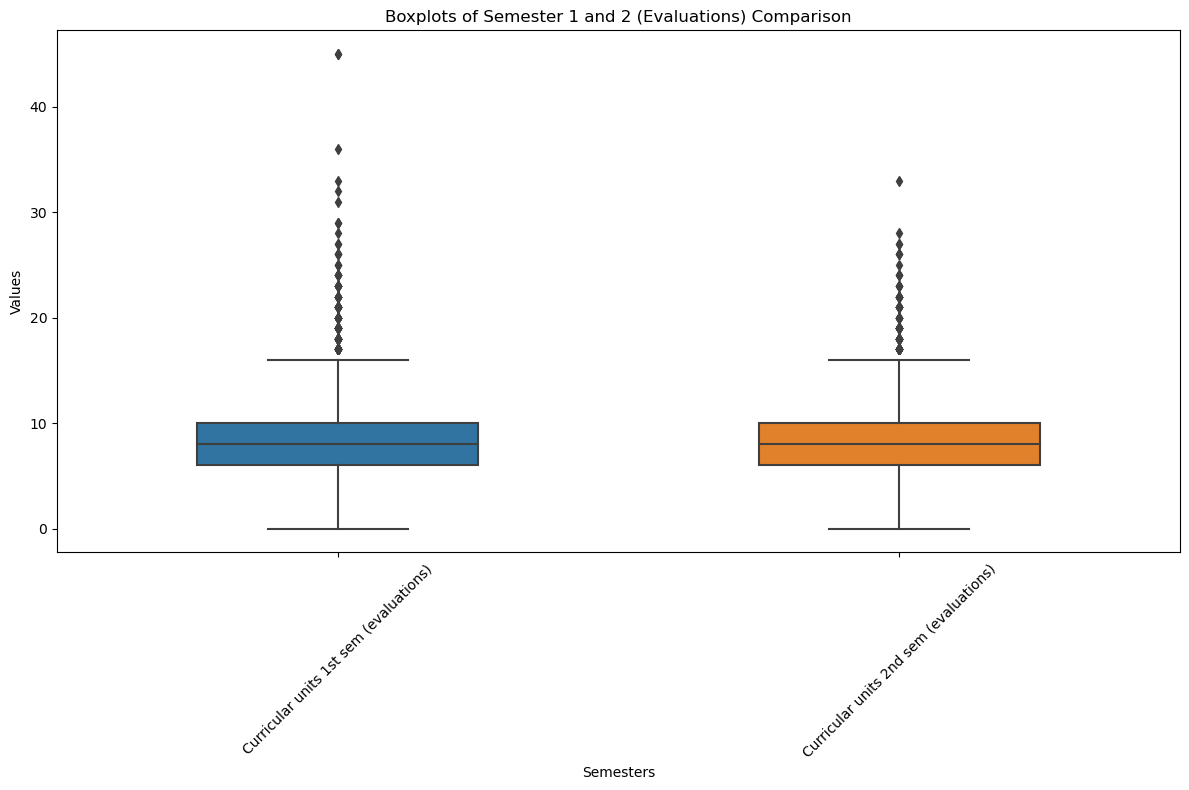

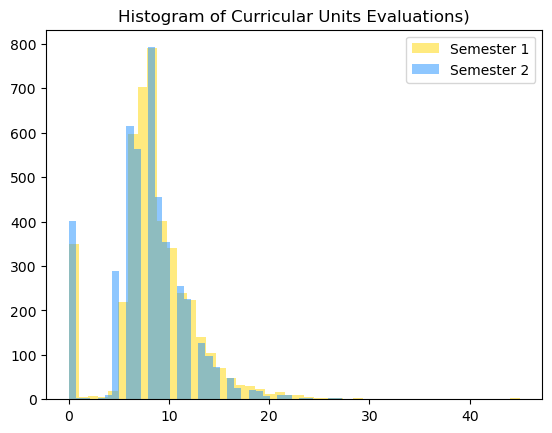

In [42]:
# Semester 2 (approved) against Target Histogram
academic_data7 = {
    "Curricular units 1st sem (evaluations)": df["Curricular units 1st sem (evaluations)"],
    "Curricular units 2nd sem (evaluations)": df["Curricular units 2nd sem (evaluations)"]
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df7 = pd.DataFrame(academic_data7)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df7, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 1 and 2 (Evaluations) Comparison')
plt.xlabel('Semesters')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('evaluations_boxplots.png')
plt.tight_layout()
plt.show()

# 1st and 2nd Semester (evaluations) histograms on the same axis
plt.hist(df["Curricular units 1st sem (evaluations)"],bins = 46, alpha = 0.5, color = 'gold')
plt.hist(df["Curricular units 2nd sem (evaluations)"],bins = 46, alpha = 0.5,color = 'dodgerblue')
plt.title("Histogram of Curricular Units Evaluations)")
plt.legend(['Semester 1', 'Semester 2'])
plt.savefig('evaluations.png')
plt.show()

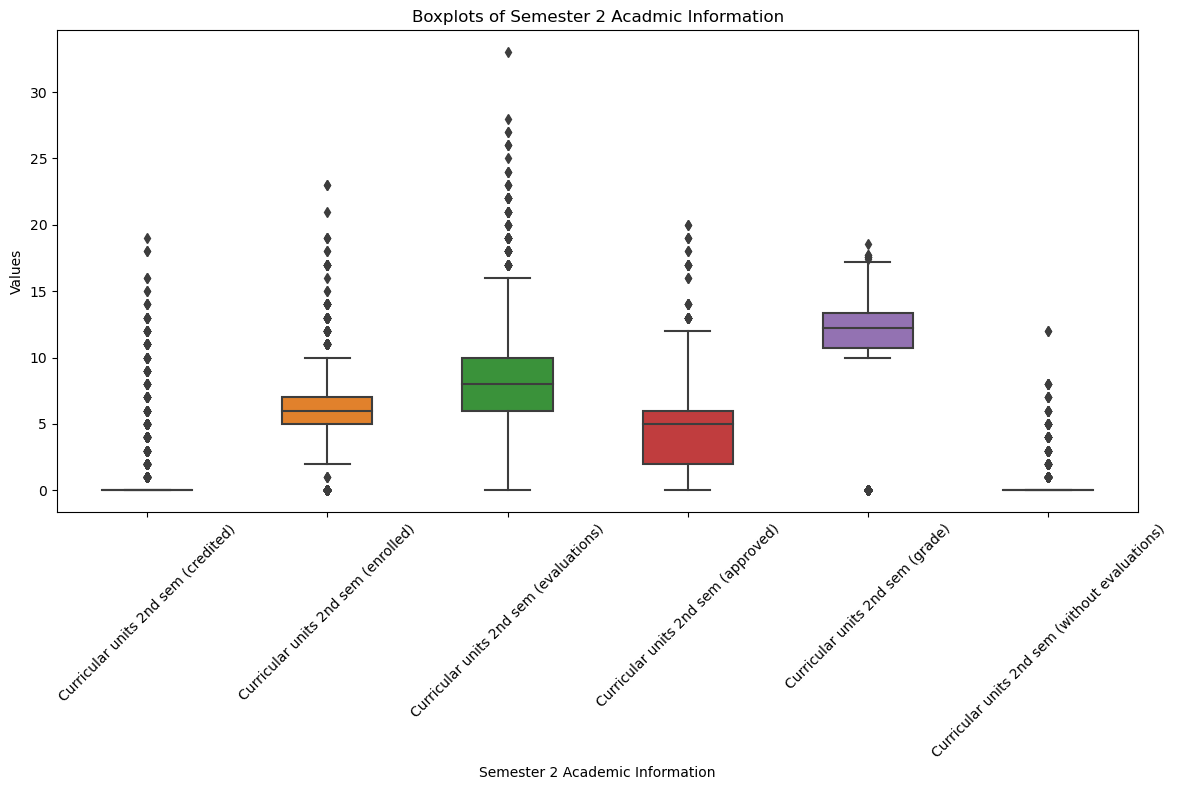

In [43]:
# Semester 1 and 2 Enrolled, Evaluations, and credited Boxplots
academic_data2 = {
    "Curricular units 2nd sem (credited)": df["Curricular units 2nd sem (credited)"],
    "Curricular units 2nd sem (enrolled)": df["Curricular units 2nd sem (enrolled)"],
    "Curricular units 2nd sem (evaluations)": df["Curricular units 2nd sem (evaluations)"],
    "Curricular units 2nd sem (approved)": df["Curricular units 2nd sem (approved)"],
    "Curricular units 2nd sem (grade)": df["Curricular units 2nd sem (grade)"],
    "Curricular units 2nd sem (without evaluations)": df["Curricular units 2nd sem (without evaluations)"],
}

# Boxplots for Semester 2 Academic Information
plt.figure(figsize=(12, 8))

# Create a DataFrame
academic_df2 = pd.DataFrame(academic_data2)

# Create boxplots using Seaborn with custom colors
sns.boxplot(data=academic_df2, width=0.5)

# Add a title and labels
plt.title('Boxplots of Semester 2 Acadmic Information')
plt.xlabel('Semester 2 Academic Information')
plt.ylabel('Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and Show the plot
plt.savefig('sem2_academic_information_boxplots.png')
plt.tight_layout()
plt.show()

# Curricular units 2nd sem (approved) Compared by Target: #
This feature was the only feature listed as having high correlation to the Target, so I wanted to visualize it.

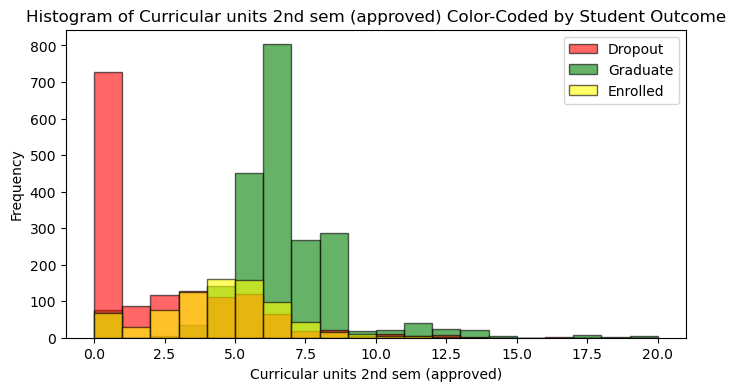

In [44]:
# Histogram for "Curricular units 2nd sem (approved)" grouped by Target
feature_to_plot = "Curricular units 2nd sem (approved)"

# Calculate bin edges for fixed-size bins
bin_edges = np.histogram_bin_edges(df[feature_to_plot], bins=20)

# Calculate the width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create histograms for each category of the target feature
for idx, category in enumerate(target_categories):
    category_data = df[df[target_feature] == category][feature_to_plot]
    
    # Change zorder based on your specified order
    if category == target_categories[0]:
        zorder_value = 1
    elif category == target_categories[1]:
        zorder_value = 0
    else:
        zorder_value = 2
    
    ax.hist(category_data, bins=bin_edges, color=category_colors[category], edgecolor='black',
            alpha=0.6, label=f"{target_feature} = {category}", align='mid', rwidth=bin_width,
            zorder=zorder_value)  # Use zorder parameter

# Set labels and title
plt.title(f"Histogram of {feature_to_plot} Color-Coded by Student Outcome")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.legend(['Dropout', 'Graduate', 'Enrolled'])

# Save and show the plot
plt.savefig('2nd_sem_approved_by_target.png')
plt.show()